In [366]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import math

In [367]:
tickers=input("Enter ticket name: ").upper()
coun=input("Enter country name: ").upper()
df=yf.download(tickers+'.'+coun,period='5y')

Enter ticket name: TATAMOTORS
Enter country name: NS


[*********************100%%**********************]  1 of 1 completed


In [368]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-12,218.949997,219.000000,215.000000,215.949997,215.279037,21788548
2019-04-15,217.149994,233.250000,217.149994,231.750000,231.029953,57283251
2019-04-16,233.800003,234.100006,225.649994,230.500000,229.783829,41653657
2019-04-18,231.899994,239.300003,230.600006,236.250000,235.515976,42451178
2019-04-22,235.000000,239.350006,231.699997,234.850006,234.120331,30282217
...,...,...,...,...,...,...
2024-04-05,1011.599976,1012.500000,1004.400024,1007.099976,1007.099976,4519120
2024-04-08,1010.049988,1016.400024,1004.000000,1013.200012,1013.200012,5188052
2024-04-09,1021.000000,1029.500000,1005.000000,1008.500000,1008.500000,8539041


In [369]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [370]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [371]:
df1=df.iloc[:,0]
df1.dtypes

dtype('float64')

In [372]:
df['Date']=df.index

In [373]:
df.shape

(1235, 7)

In [374]:
df.index=[i for i in range(0,df.shape[0])]
df

,Open,High,Low,Close,Adj Close,Volume,Date
0,218.949997,219.000000,215.000000,215.949997,215.279037,21788548,2019-04-12
1,217.149994,233.250000,217.149994,231.750000,231.029953,57283251,2019-04-15
2,233.800003,234.100006,225.649994,230.500000,229.783829,41653657,2019-04-16
3,231.899994,239.300003,230.600006,236.250000,235.515976,42451178,2019-04-18
4,235.000000,239.350006,231.699997,234.850006,234.120331,30282217,2019-04-22
...,...,...,...,...,...,...,...
1230,1011.599976,1012.500000,1004.400024,1007.099976,1007.099976,4519120,2024-04-05
1231,1010.049988,1016.400024,1004.000000,1013.200012,1013.200012,5188052,2024-04-08
1232,1021.000000,1029.500000,1005.000000,1008.500000,1008.500000,8539041,2024-04-09
1233,1012.250000,1021.000000,1010.000000,1013.500000,1013.500000,4554077,2024-04-10


In [375]:
L=df['Date'].to_numpy()
df.insert(0,'DATE',L)

In [376]:
df.rename(columns={'DATE':'Date'},inplace=True)

In [377]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Date
0,2019-04-12,218.949997,219.000000,215.000000,215.949997,215.279037,21788548,2019-04-12
1,2019-04-15,217.149994,233.250000,217.149994,231.750000,231.029953,57283251,2019-04-15
2,2019-04-16,233.800003,234.100006,225.649994,230.500000,229.783829,41653657,2019-04-16
3,2019-04-18,231.899994,239.300003,230.600006,236.250000,235.515976,42451178,2019-04-18
4,2019-04-22,235.000000,239.350006,231.699997,234.850006,234.120331,30282217,2019-04-22
...,...,...,...,...,...,...,...,...
1230,2024-04-05,1011.599976,1012.500000,1004.400024,1007.099976,1007.099976,4519120,2024-04-05
1231,2024-04-08,1010.049988,1016.400024,1004.000000,1013.200012,1013.200012,5188052,2024-04-08
1232,2024-04-09,1021.000000,1029.500000,1005.000000,1008.500000,1008.500000,8539041,2024-04-09
1233,2024-04-10,1012.250000,1021.000000,1010.000000,1013.500000,1013.500000,4554077,2024-04-10


In [378]:
df['Date'].dtypes

Date    datetime64[ns]
Date    datetime64[ns]
dtype: object

In [379]:
df['Return'] = np.log((df['Close'].diff() / df['Close'].shift(1))+1)

In [380]:
df.loc[0,'Return']=df['Return'].mean()

In [381]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Date,Return
0,2019-04-12,218.949997,219.000000,215.000000,215.949997,215.279037,21788548,2019-04-12,0.001257
1,2019-04-15,217.149994,233.250000,217.149994,231.750000,231.029953,57283251,2019-04-15,0.070612
2,2019-04-16,233.800003,234.100006,225.649994,230.500000,229.783829,41653657,2019-04-16,-0.005408
3,2019-04-18,231.899994,239.300003,230.600006,236.250000,235.515976,42451178,2019-04-18,0.024640
4,2019-04-22,235.000000,239.350006,231.699997,234.850006,234.120331,30282217,2019-04-22,-0.005944
...,...,...,...,...,...,...,...,...,...
1230,2024-04-05,1011.599976,1012.500000,1004.400024,1007.099976,1007.099976,4519120,2024-04-05,-0.004458
1231,2024-04-08,1010.049988,1016.400024,1004.000000,1013.200012,1013.200012,5188052,2024-04-08,0.006039
1232,2024-04-09,1021.000000,1029.500000,1005.000000,1008.500000,1008.500000,8539041,2024-04-09,-0.004650
1233,2024-04-10,1012.250000,1021.000000,1010.000000,1013.500000,1013.500000,4554077,2024-04-10,0.004946


In [382]:
z_scores = np.abs(stats.zscore(df['Return']))
threshold = 3
outliers_zscore = df[np.abs(z_scores)>threshold]

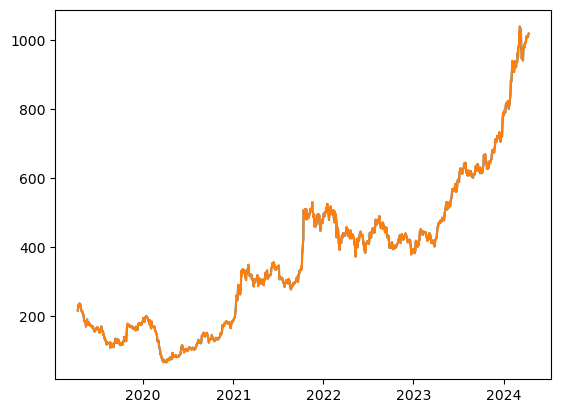

In [383]:
plt.plot(df['Date'],df['Close'])
plt.show()

In [384]:
x=df[['Open','High','Low','Volume']]
y=df['Close']

In [385]:
x

,Open,High,Low,Volume
0,218.949997,219.000000,215.000000,21788548
1,217.149994,233.250000,217.149994,57283251
2,233.800003,234.100006,225.649994,41653657
3,231.899994,239.300003,230.600006,42451178
4,235.000000,239.350006,231.699997,30282217
...,...,...,...,...
1230,1011.599976,1012.500000,1004.400024,4519120
1231,1010.049988,1016.400024,1004.000000,5188052
1232,1021.000000,1029.500000,1005.000000,8539041
1233,1012.250000,1021.000000,1010.000000,4554077


In [386]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.8,random_state=0)
lreg=LinearRegression()

In [387]:
lreg.fit(X_train,Y_train)

LinearRegression()

In [388]:
print(lreg.coef_)

[-4.97505387e-01  7.85173117e-01  7.11622403e-01  2.73148837e-09]


In [389]:
print(lreg.intercept_)

-0.3408076234359214


In [390]:
predict=lreg.predict(X_test)

In [391]:
predict.shape

(988,)

In [392]:
dtest=pd.DataFrame({'Actaul Price':Y_test,'Predicted Price':predict})

In [393]:
print(dtest)

      Actaul Price  Predicted Price
1083    607.150024       608.267408
18      184.500000       183.645273
1099    627.049988       629.925293
818     476.250000       472.189330
184     200.350006       199.174927
...            ...              ...
83      121.349998       119.757954
43      154.649994       157.221834
860     407.899994       405.516081
1187    878.500000       882.312270
967     432.200012       435.228635

[988 rows x 2 columns]


In [394]:
lreg.score(X_test,Y_test)

0.999826519083881

In [395]:
print("Absolute mean error:",metrics.mean_absolute_error(Y_test,predict))

Absolute mean error: 2.024258975441127


In [396]:
print("Mean squared error:",metrics.mean_squared_error(Y_test,predict))

Mean squared error: 7.964860547093798


In [397]:
print("Root mean squared error:",math.sqrt(metrics.mean_squared_error(Y_test,predict)))

Root mean squared error: 2.8222084520980726
